This is a simple example project where I want to extract parameters from piece of spectrum data that I have. My gaussian function has the following form:

$f(x) = a \mathrm{e}{\frac{-(x-c)^2}{2c^2}} + d$

Where $a$ is a normalisation coefficient, $b$ is the center point, $c$ defines with the width of the curve and $d$ is the height above the x axis.

First lets load and plot the data

In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import numpy as np

Populating the interactive namespace from numpy and matplotlib


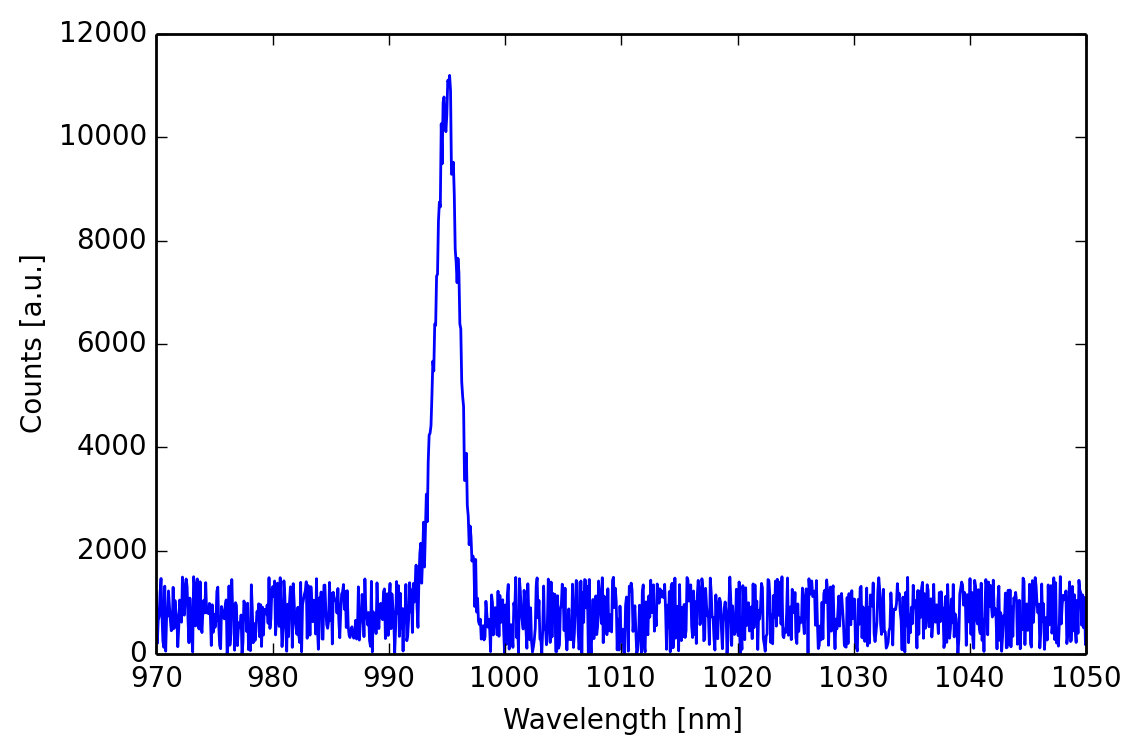

In [4]:
x, y = np.loadtxt('./data/data.txt').T
plt.plot(x, y)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Counts [a.u.]')

Clearly the data is a nice gaussian, so lets fit the function to get the center point and 
full-width at half max, which is given by 

$FWHM = 2\sqrt{2 ln(2)}$

First we import some code which contains the gauss equation, and the optimize function from scipy to do the curve fitting.

In [5]:
from scipy.optimize import curve_fit

def gauss(t, a, b, c, d):
    return a*np.exp(-((t-b)**2)/(2*c**2)) + d

In [6]:
p0 = [700, 990, 2, 0]
params, cov = curve_fit(gauss, x, y, p0=p0)
err = np.sqrt(np.diag(cov))

print("a = %lf +- %lf" % (params[0], err[0]))
print("b = %lf +- %lf" % (params[1], err[1]))
print("c = %lf +- %lf" % (params[2], err[2]))
print("d = %lf +- %lf" % (params[3], err[3]))

a = 9940.234967 +- 112.462988
b = 995.014369 +- 0.013048
c = 1.002707 +- 0.013202
d = 761.728754 +- 14.103390


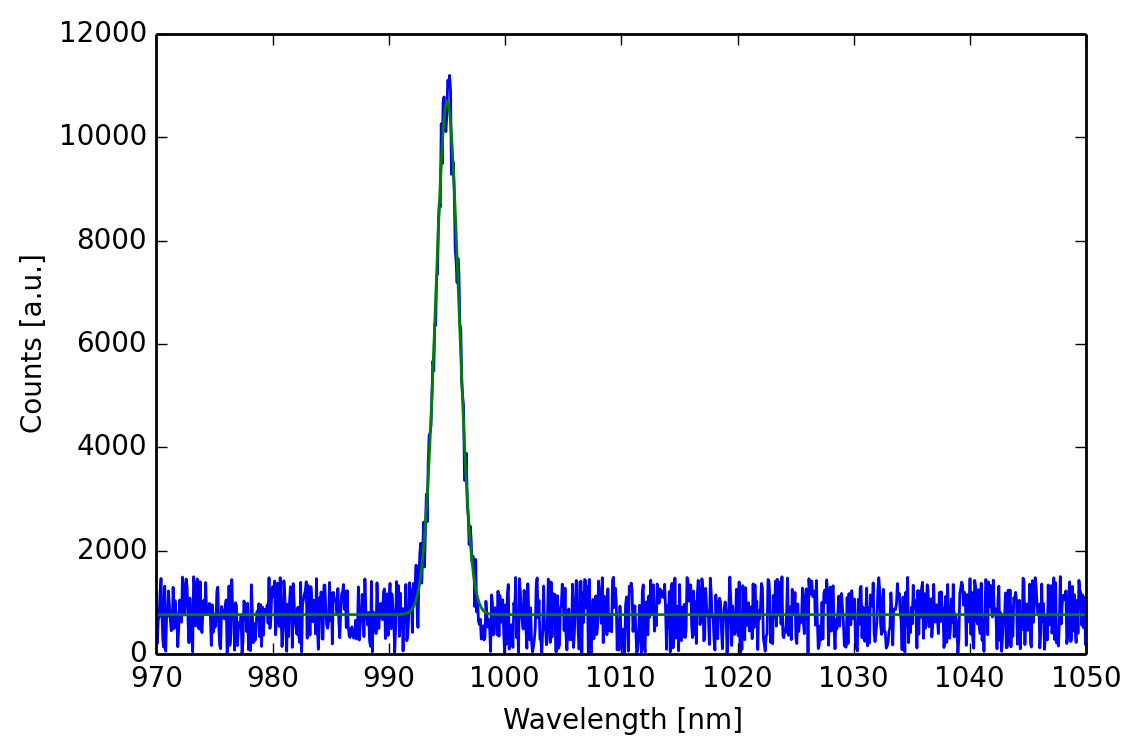

In [7]:
plt.plot(x, y)
plt.plot(x, gauss(x, *params))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Counts [a.u.]')

So here we have a pretty good fit, and we were able to find the intensity, center point and width of the curve.
Lets just finally calculate the FWHM

In [8]:
FWHM = 2*np.sqrt(2*np.log(2))
print(FWHM)

2.35482004503
